In [1]:
suppressMessages(suppressWarnings(library(tidyverse)))
suppressMessages(suppressWarnings(library(ggcorrplot)))
library('ggpubr')
library('metap')
suppressWarnings(suppressMessages(library('scico')))

Warning message:
"package 'ggpubr' was built under R version 4.2.1"
Warning message:
"package 'metap' was built under R version 4.2.1"


In [2]:
df <- read.table("../../ANALYSIS/PHEWAS/Multiancestry_PHEWAS.TAB",header=TRUE)

In [3]:
head(df)

,CHR,varPos,pValue,beta,group,GENE,count
,<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,1,1:110470764,1.58e-52,-0.026900,LIPIDS,CSF1,328
2,1,1:110470764,5.86e-51,-0.050200,HEPATIC,CSF1,328
3,1,1:110470764,2.16e-48,0.034443,HEMATOLOGICAL,CSF1,328
4,1,1:110470764,4.22e-41,-0.066100,CARDIOVASCULAR,CSF1,328
5,1,1:110470764,7.95e-33,0.026363,HEMATOLOGICAL,CSF1,328
6,1,1:110470764,2.90e-23,-0.048400,OTHER,CSF1,328


In [4]:
suppressWarnings(df_plot <- df%>%group_by(GENE,group)%>% filter(pValue < 5E-02)%>%mutate(positive=sum(beta>0),negative=sum(beta<0))%>%
mutate(ncount = n())%>%mutate(logp=case_when(ncount>1 ~ as.double(allmetap(as.double(pValue),method="sumz")$p)))%>%mutate(logp = coalesce(logp,pValue))%>%mutate(logp=-log10(logp))%>%
ungroup()%>%mutate(logp= as.numeric(ifelse(is.finite(logp), logp, "200")))%>%mutate(logp= as.numeric(ifelse(logp<200, logp, "200"))))

In [5]:
head(df_plot)

CHR,varPos,pValue,beta,group,GENE,count,positive,negative,ncount,logp
<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>
1,1:110470764,1.58e-52,-0.026900,LIPIDS,CSF1,328,2,2,4,52.28460
1,1:110470764,5.86e-51,-0.050200,HEPATIC,CSF1,328,0,4,4,57.56767
1,1:110470764,2.16e-48,0.034443,HEMATOLOGICAL,CSF1,328,10,1,11,111.13010
1,1:110470764,4.22e-41,-0.066100,CARDIOVASCULAR,CSF1,328,5,5,10,31.38072
1,1:110470764,7.95e-33,0.026363,HEMATOLOGICAL,CSF1,328,10,1,11,111.13010
1,1:110470764,2.90e-23,-0.048400,OTHER,CSF1,328,0,1,1,22.53760


In [6]:
df_final<- df_plot%>%mutate(shape=case_when(positive > negative ~"up",negative > positive ~"down",TRUE ~ "neutral"))%>%distinct(group,GENE,.keep_all =TRUE)%>%arrange(CHR)

In [7]:
df_final%>%filter(GENE=="IRS1")

CHR,varPos,pValue,beta,group,GENE,count,positive,negative,ncount,logp,shape
<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<chr>
2,2:227123086,2.120e-192,0.031700,LIPIDS,IRS1,329,4,3,7,171.893493,up
2,2:227123086,2.070e-39,0.022700,GLYCEMIC,IRS1,329,12,4,16,91.701687,up
2,2:227123086,3.730e-32,0.005100,HEPATIC,IRS1,329,5,1,6,66.052551,up
2,2:227123086,2.600e-14,0.013000,CARDIOVASCULAR,IRS1,329,7,1,8,33.926123,up
2,2:227123086,6.470e-14,0.013416,HEMATOLOGICAL,IRS1,329,9,3,12,66.589013,up
2,2:227123086,9.270e-11,-0.030700,ANTHROPOMETRIC,IRS1,329,1,8,9,23.076834,down
2,2:227123086,3.890e-05,0.000900,METABOLITE,IRS1,329,1,0,1,4.410050,up
2,2:227123086,9.210e-05,0.027100,RENAL,IRS1,329,6,0,6,12.085048,up
2,2:227123086,6.800e-04,-0.013300,NUTRITIONAL,IRS1,329,1,1,2,4.953245,neutral


In [11]:
df_final%>%filter(pValue < 5E-08)%>%distinct()

CHR,varPos,pValue,beta,group,GENE,count,positive,negative,ncount,logp,shape
<int>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<dbl>,<chr>
1,1:110470764,1.58e-52,-0.026900,LIPIDS,CSF1,328,2,2,4,52.28460,neutral
1,1:110470764,5.86e-51,-0.050200,HEPATIC,CSF1,328,0,4,4,57.56767,down
1,1:110470764,2.16e-48,0.034443,HEMATOLOGICAL,CSF1,328,10,1,11,111.13010,up
1,1:110470764,4.22e-41,-0.066100,CARDIOVASCULAR,CSF1,328,5,5,10,31.38072,neutral
1,1:110470764,2.90e-23,-0.048400,OTHER,CSF1,328,0,1,1,22.53760,down
1,1:110470764,4.58e-17,-0.005800,RENAL,CSF1,328,2,4,6,15.11910,down
1,1:219665008,3.51e-56,0.031900,ANTHROPOMETRIC,LYPAL1-AS1,325,4,5,10,116.18888,down
1,1:219665008,1.79e-34,0.016300,LIPIDS,LYPAL1-AS1,325,4,1,5,62.23004,up
1,1:219665008,4.62e-17,0.013900,GLYCEMIC,LYPAL1-AS1,325,9,3,12,43.38501,up


In [8]:
summary(df_final$logp)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.320   2.495   5.618  20.762  21.110 200.000 

In [91]:
options(repr.plot.width=16, repr.plot.height=9)
p1 <- ggdotchart(df_final,"GENE", y = "group",color="logp",
   rotate = FALSE, sorting = "none",dot.size = 5,shape="shape",
            ggtheme = theme_bw()+theme_cleveland())  + scale_y_discrete(labels=function(x) gsub("_", " ", x, fixed=TRUE))+ 
  scale_color_scico(
    palette = "roma",midpoint=20,
    name = "logp Enrichment",direction = -1
  )+
                                                                        
                                                                        theme(axis.text = element_text(size=16))+guides(color = guide_colourbar(barwidth = 0.5,
                                barheight = 20))+ggtitle("PheWAS CMDKP")+scale_shape_manual(values=c("up"="\u25B2","down"="\u25BC","neutral"="\u25A0"))+xlab("")

In [92]:
scico_palette_names()

[1] "acton"   "bam"     "bamako"  "bamO"    "batlow"  "batlowK" "batlowW"
 [8] "berlin"  "bilbao"  "broc"    "brocO"   "buda"    "bukavu"  "cork"   
[15] "corkO"   "davos"   "devon"   "fes"     "grayC"   "hawaii"  "imola"  
[22] "lajolla" "lapaz"   "lisbon"  "nuuk"    "oleron"  "oslo"    "roma"   
[29] "romaO"   "tofino"  "tokyo"   "turku"   "vanimo"  "vik"     "vikO"

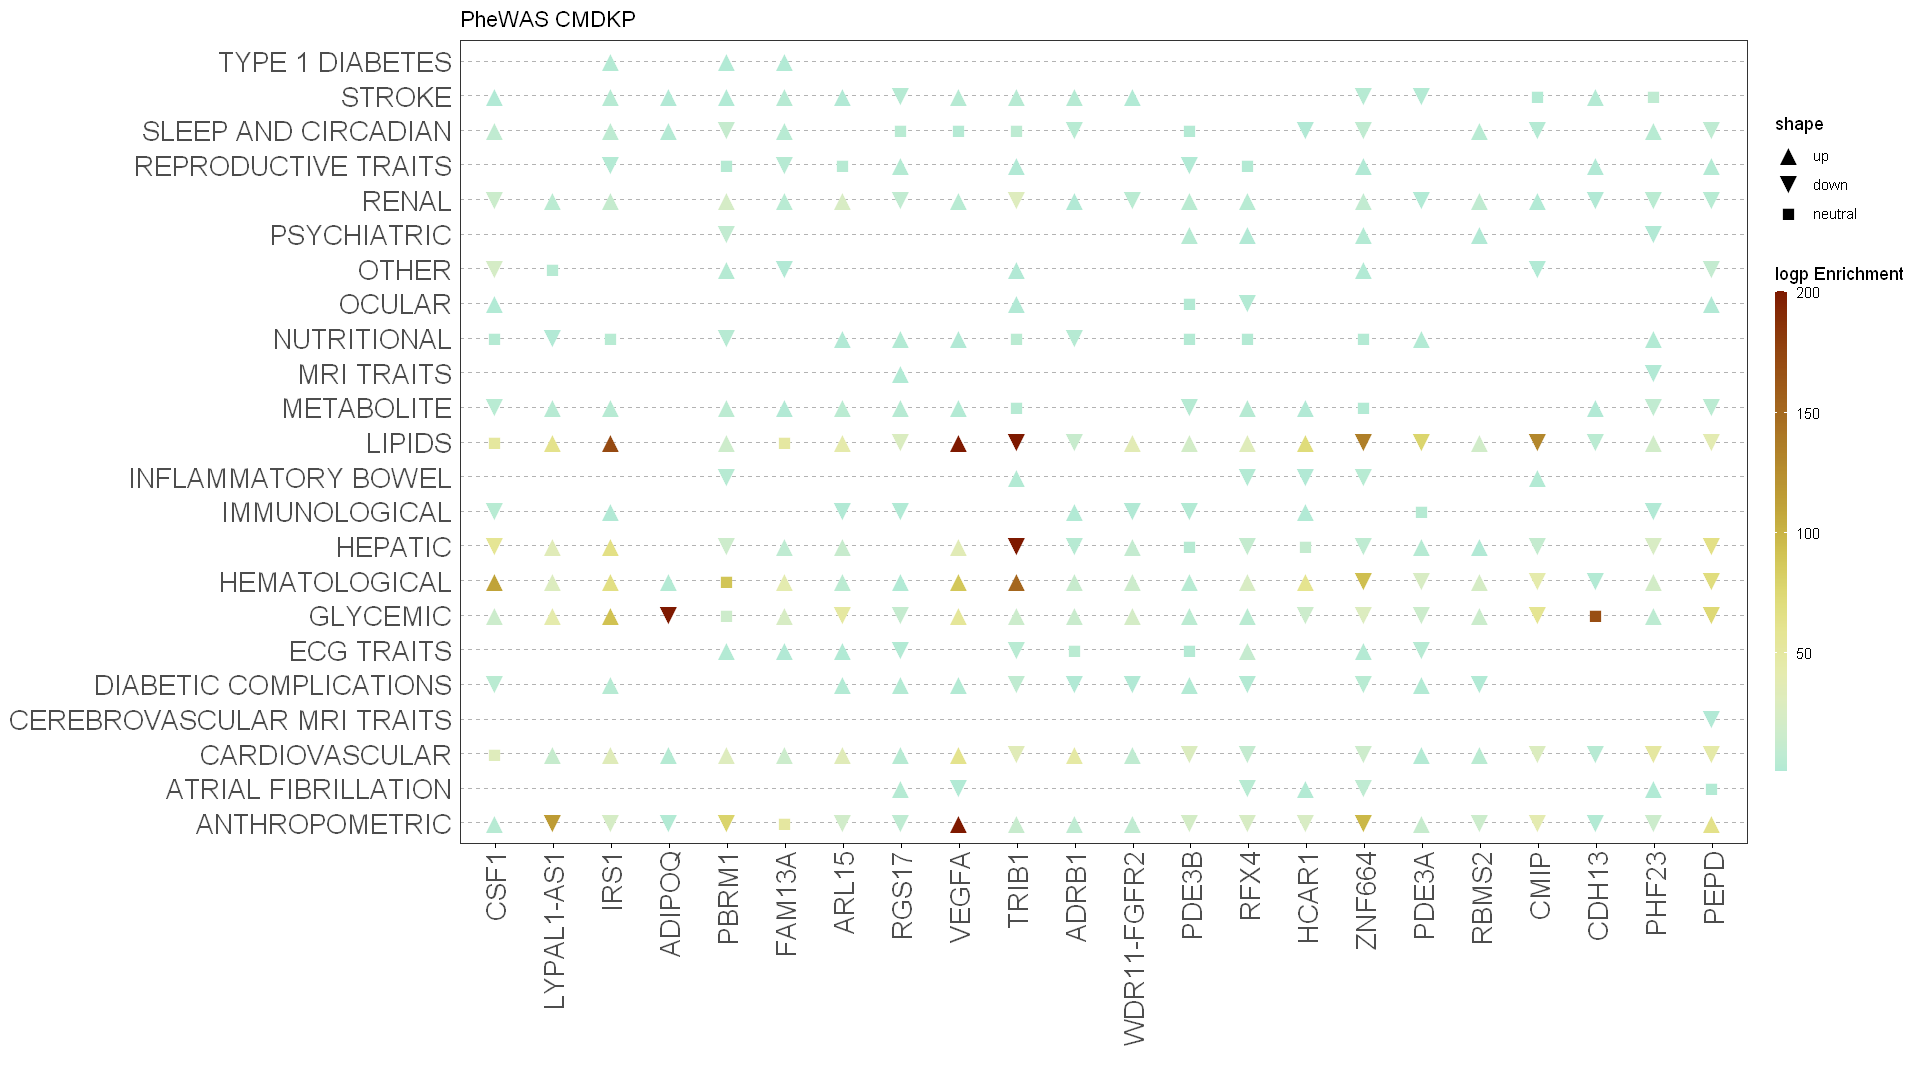

In [93]:
p1

In [94]:
ggsave(filename = "../../ANALYSIS/PAPER/Figures/Supplementary/SuppFig8.jpeg", device = "jpeg",  plot = p1, width = 16, height =9 , dpi = 600, units = "in")

In [95]:
ggsave(filename = "../../ANALYSIS/PAPER/Figures/Supplementary/SuppFig8.pdf", device = "pdf",  plot = p1, width = 16, height =9 , dpi = 600, units = "in")

Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
"conversion failure on '▼' in 'mbcsToSbcs': dot substituted for <e2>"
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
"conversion failure on '▼' in 'mbcsToSbcs': dot substituted for <96>"
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
"conversion failure on '▼' in 'mbcsToSbcs': dot substituted for <bc>"
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
"font metrics unknown for Unicode character U+25bc"
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
"conversion failure on '▼' in 'mbcsToSbcs': dot substituted for <e2>"
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
"conversion failure on '▼' in 'mbcsToSbcs': dot substituted for <96>"
Warning message in grid.Call.graphics(C_points, x$x, x$y, x$pch, x$size):
"conversion failure on '▼' in 'mbcsToSbcs': dot substituted for <bc>"
Warning me

In [21]:
options(repr.plot.width=20, repr.plot.height=10)
p2 <- df  %>%
  ggplot(aes(x=GENE, y=group, size=count, fill=count)) +
    geom_point(alpha=0.5, shape=21, color="black")+scale_size(range = c(4, 66), name="Number of associations")+
    theme(legend.position="bottom") +theme(axis.text = element_text(size=15))+
    ylab("") +
    xlab("")+ scale_y_discrete(labels=function(x) gsub("_", " ", x, fixed=TRUE))+theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank(), axis.line = element_line(colour = "black"))+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))

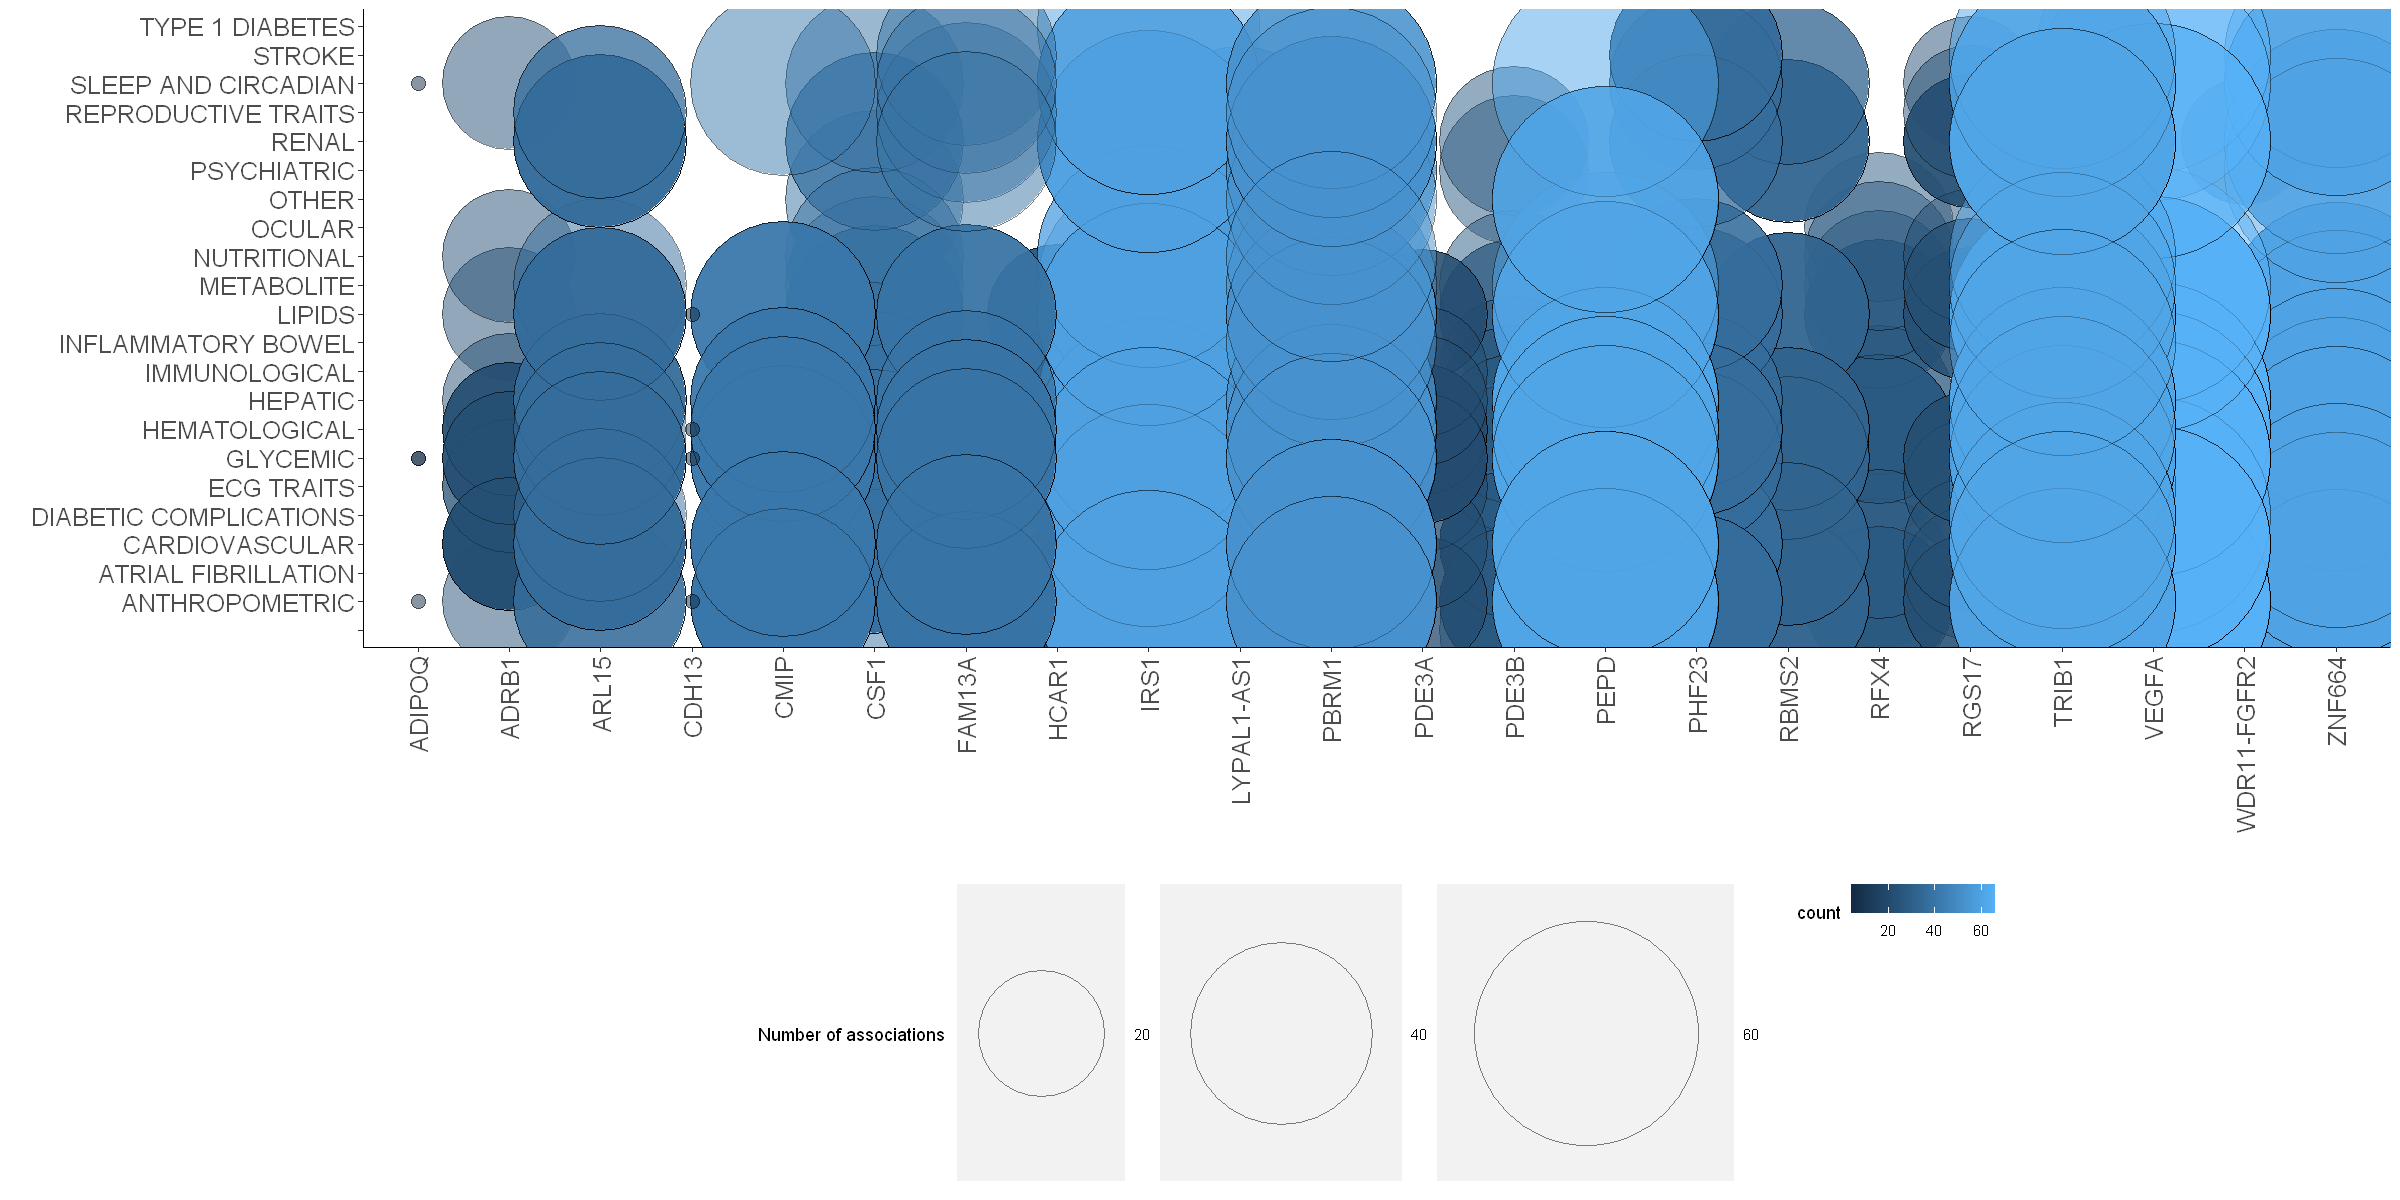

In [22]:
p2

In [20]:
min(df$count)

[1] 4

In [329]:
install.packages('relaimpo')

Installing package into 'C:/Users/svish/AppData/Local/R/win-library/4.2'
(as 'lib' is unspecified)

also installing the dependencies 'survey', 'mitools'




package 'survey' successfully unpacked and MD5 sums checked
package 'mitools' successfully unpacked and MD5 sums checked
package 'relaimpo' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\svish\AppData\Local\Temp\Rtmpkrh7Ia\downloaded_packages
